<a href="https://colab.research.google.com/github/namne21123-ops/New-with-ENGR-Lead-Inventory-Op-Operations-Research./blob/main/Project_2_Demand_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dates = pd.date_range(start='2024-01-01', periods = 60, freq='D')

np.random.seed(42)

sales = np.random.randint(low=100, high=500, size=60)

df = pd.DataFrame({'Date': dates, 'Sales': sales})

print("Head of the DateFrame")
print(df.head())
print("\nImportant Data Information")
print(df.info())


Head of the DateFrame
        Date  Sales
0 2024-01-01    202
1 2024-01-02    448
2 2024-01-03    370
3 2024-01-04    206
4 2024-01-05    171

Important Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    60 non-null     datetime64[ns]
 1   Sales   60 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB
None


        Date  Sales        MA_7
0 2024-01-01    202         NaN
1 2024-01-02    448         NaN
2 2024-01-03    370         NaN
3 2024-01-04    206         NaN
4 2024-01-05    171         NaN
5 2024-01-06    288         NaN
6 2024-01-07    120  257.857143
7 2024-01-08    202  257.857143
8 2024-01-09    221  225.428571
9 2024-01-10    314  217.428571


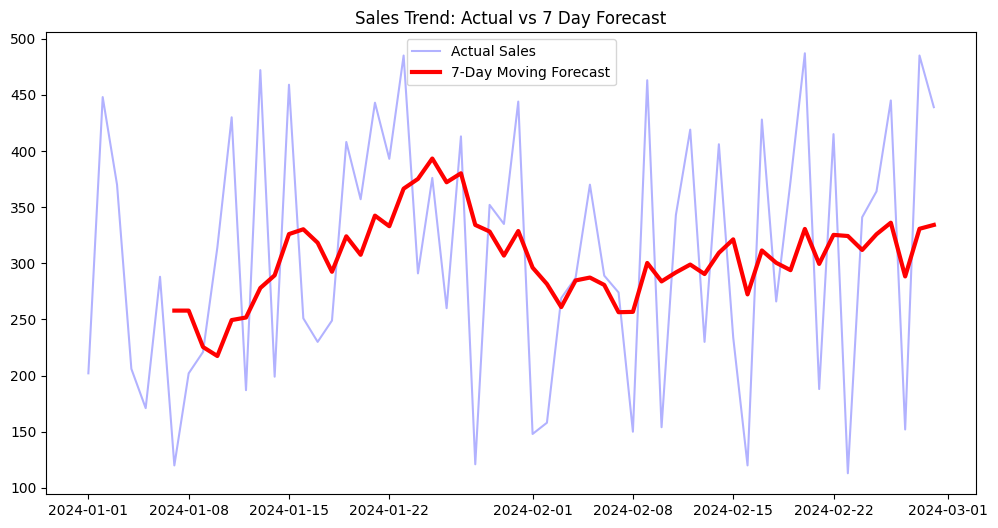

In [ ]:
df['MA_7'] = df['Sales'].rolling(window=7).mean()

print(df.head(10))

plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['Sales'], label='Actual Sales', color='Blue', alpha=0.3)

plt.plot(df['Date'], df['MA_7'], label='7-Day Moving Forecast', color='Red', linewidth=3)

plt.title('Sales Trend: Actual vs 7 Day Forecast')
plt.legend()
plt.show()

In [ ]:
last_date = df['Date'].iloc[-1]

forecast_value = df['MA_7'].iloc[-1]

print(f"The Final day in Data: {last_date}")
print(f"The Revenue Forecast for the next day: {forecast_value}")

The Final day in Data: 2024-02-29 00:00:00
The Revenue Forecast for the next day: 334.14285714285717


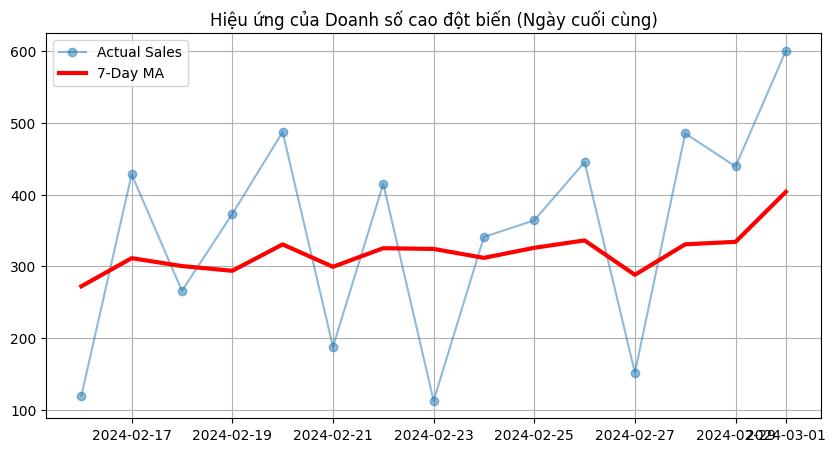

         Date  Sales        MA_7
58 2024-02-28    485  330.714286
59 2024-02-29    439  334.142857
60 2024-03-01    600  403.714286


In [ ]:
# 1. Tạo một dòng dữ liệu mới cho ngày mai (Ngày 61)
# Giả sử ta chạy quảng cáo và bán được 600 (Rất cao!)
new_date = df['Date'].iloc[-1] + pd.Timedelta(days=1)
new_sales = 600

# Tạo DataFrame cho dòng mới này
new_row = pd.DataFrame({'Date': [new_date], 'Sales': [new_sales]})

# 2. Gắn dòng mới vào bảng dữ liệu cũ (dùng pd.concat)
df_extended = pd.concat([df, new_row], ignore_index=True)

# 3. Tính lại MA_7 cho bảng dữ liệu mới
df_extended['MA_7'] = df_extended['Sales'].rolling(window=7).mean()

# 4. Vẽ biểu đồ (Chỉ xem 15 ngày cuối để thấy rõ sự thay đổi)
plt.figure(figsize=(10, 5))
plt.plot(df_extended['Date'].tail(15), df_extended['Sales'].tail(15), label='Actual Sales', marker='o', alpha=0.5)
plt.plot(df_extended['Date'].tail(15), df_extended['MA_7'].tail(15), label='7-Day MA', color='red', linewidth=3)

plt.title('Hiệu ứng của Doanh số cao đột biến (Ngày cuối cùng)')
plt.legend()
plt.grid(True)
plt.show()

# In ra 3 ngày cuối cùng để xem con số cụ thể
print(df_extended[['Date', 'Sales', 'MA_7']].tail(3))

First 5 rows:
         Date  Births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44

Data, Check carefully:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None
        Date  Births       MA_7
0 1959-01-01      35        NaN
1 1959-01-02      32        NaN
2 1959-01-03      30        NaN
3 1959-01-04      31        NaN
4 1959-01-05      44        NaN
5 1959-01-06      29        NaN
6 1959-01-07      45  35.142857
7 1959-01-08      43  36.285714
8 1959-01-09      38  37.142857
9 1959-01-10      27  36.714286


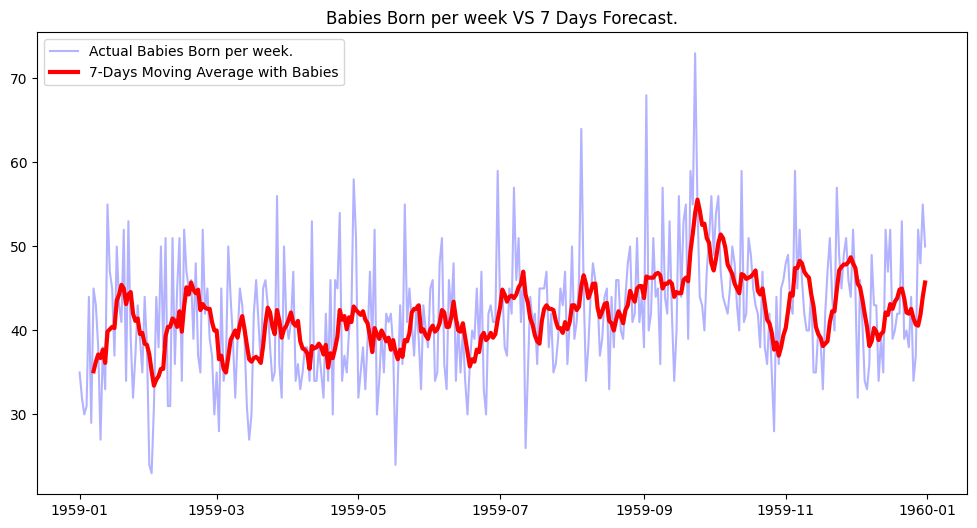

MAE (Average Error): 5.13 babies

Details Errors in Final 10 days.
          Date  Births       MA_7      Error
355 1959-12-22      39  43.857143   4.857143
356 1959-12-23      40  42.142857   2.142857
357 1959-12-24      38  42.000000   4.000000
358 1959-12-25      44  42.571429   1.428571
359 1959-12-26      34  41.428571   7.428571
360 1959-12-27      37  40.714286   3.714286
361 1959-12-28      52  40.571429  11.428571
362 1959-12-29      48  41.857143   6.142857
363 1959-12-30      55  44.000000  11.000000
364 1959-12-31      50  45.714286   4.285714
MAPE (Average Percentage Error): 12.47%
          Date  Births       MA_7      Error  MAPE_Daily
360 1959-12-27      37  40.714286   3.714286   10.038610
361 1959-12-28      52  40.571429  11.428571   21.978022
362 1959-12-29      48  41.857143   6.142857   12.797619
363 1959-12-30      55  44.000000  11.000000   20.000000
364 1959-12-31      50  45.714286   4.285714    8.571429


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Đường dẫn đến file dữ liệu (trên GitHub)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"

# Đọc dữ liệu
df_real = pd.read_csv(url)

# Kiểm tra dữ liệu
print("First 5 rows:")
print(df_real.head())

print("\nData, Check carefully:")
print(df_real.info())

df_real['Date'] = pd.to_datetime(df_real['Date'])

df_real['MA_7'] = df_real['Births'].rolling(window=7).mean()

print(df_real.head(10))

plt.figure(figsize=(12, 6))

plt.plot(df_real['Date'], df_real['Births'], label='Actual Babies Born per week.', color='Blue', alpha=.3)

plt.plot(df_real['Date'], df_real['MA_7'], label='7-Days Moving Average with Babies', color = 'red', linewidth=3)

plt.title('Babies Born per week VS 7 Days Forecast.')
plt.legend()
plt.show()

df_real['Error'] = (df_real['Births'] - df_real['MA_7']).abs()

mae = df_real['Error'].mean()

print(f"MAE (Average Error): {round(mae, 2)} babies")

print("\nDetails Errors in Final 10 days.")
print(df_real[['Date', 'Births', 'MA_7', 'Error']].tail(10))

df_real['MAPE_Daily'] = df_real['Error'] / df_real['Births'] * 100

df_real['MAPE_Daily'] = df_real['MAPE_Daily'].replace([np.inf, -np.inf], np.nan)
mape = df_real['MAPE_Daily'].mean()

print(f"MAPE (Average Percentage Error): {round(mape, 2)}%")

print(df_real[['Date', 'Births', 'MA_7', 'Error', 'MAPE_Daily']].tail())
